In [38]:
import pandas as pd
import torch 
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
from sklearn.model_selection import train_test_split 


In [39]:
df = pd.read_csv('/content/diabetes.csv')

In [40]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [41]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [42]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [43]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [44]:
#Looking at the data types is a good option to explore before examining the data.
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [45]:
#"Outcome" column type is object but reality it is an boolean type so I should convert to str for analysis .
df["Outcome"] =df["Outcome"].astype(str)
df["Outcome"]

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: object

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>, <Axes: >]], dtype=object)

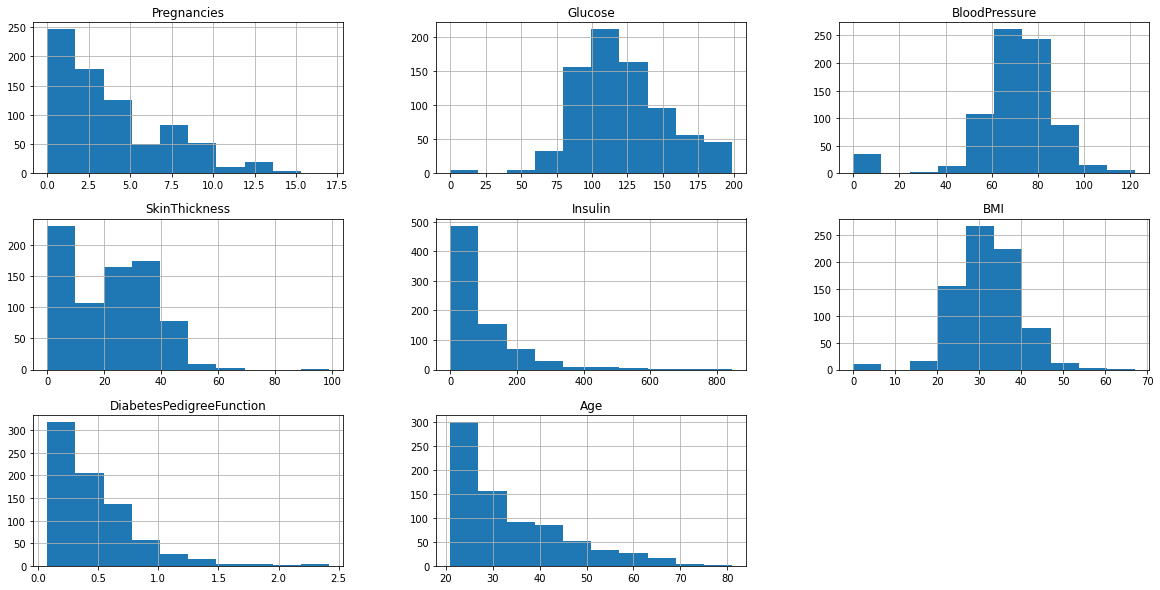

In [46]:
df.hist(figsize=(20,10))

# Feature Engineering & Data Cleaning

In [47]:
df[df["SkinThickness"] > 80]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
579,2,197,70,99,0,34.7,0.575,62,1


In [48]:
#I said that it is not logical where "SkinThickness" is greater than 80 so I updated the dataset with this code.
df = df[df["SkinThickness"] != 99]
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [49]:
df[df["Pregnancies"] > 15]


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
159,17,163,72,41,114,40.9,0.817,47,1


In [50]:
#It is not logical that when woman age is 47 and her "Pregnancies" is 17. There is one person is like this.
#I take out this value also
df = df[df["Pregnancies"] < 15]
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [51]:
#Missing values
missing_value = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
missing_value
df[missing_value]

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
0,148,72,35,0,33.6
1,85,66,29,0,26.6
2,183,64,0,0,23.3
3,89,66,23,94,28.1
4,137,40,35,168,43.1
...,...,...,...,...,...
763,101,76,48,180,32.9
764,122,70,27,0,36.8
765,121,72,23,112,26.2
766,126,60,0,0,30.1


In [52]:
#I checked the whether these columns has missing values, then I used the numpy where method. 
#If the value in missing information columns is equal to 0, fill them with 'np.nan' so (NaN) if not, write your own value.
df[missing_value] =np.where(df[missing_value] == 0, np.nan, df[missing_value])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 765 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               765 non-null    int64  
 1   Glucose                   760 non-null    float64
 2   BloodPressure             730 non-null    float64
 3   SkinThickness             538 non-null    float64
 4   Insulin                   392 non-null    float64
 5   BMI                       754 non-null    float64
 6   DiabetesPedigreeFunction  765 non-null    float64
 7   Age                       765 non-null    int64  
 8   Outcome                   765 non-null    object 
dtypes: float64(6), int64(2), object(1)
memory usage: 59.8+ KB


<ipython-input-52-755435aeb8fe>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[missing_value] =np.where(df[missing_value] == 0, np.nan, df[missing_value])


In [53]:
#The method that I can control whether the columns have null values.
df.isnull().any()

Pregnancies                 False
Glucose                      True
BloodPressure                True
SkinThickness                True
Insulin                      True
BMI                          True
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [54]:
df = df.reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 765 entries, 0 to 764
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               765 non-null    int64  
 1   Glucose                   760 non-null    float64
 2   BloodPressure             730 non-null    float64
 3   SkinThickness             538 non-null    float64
 4   Insulin                   392 non-null    float64
 5   BMI                       754 non-null    float64
 6   DiabetesPedigreeFunction  765 non-null    float64
 7   Age                       765 non-null    int64  
 8   Outcome                   765 non-null    object 
dtypes: float64(6), int64(2), object(1)
memory usage: 53.9+ KB


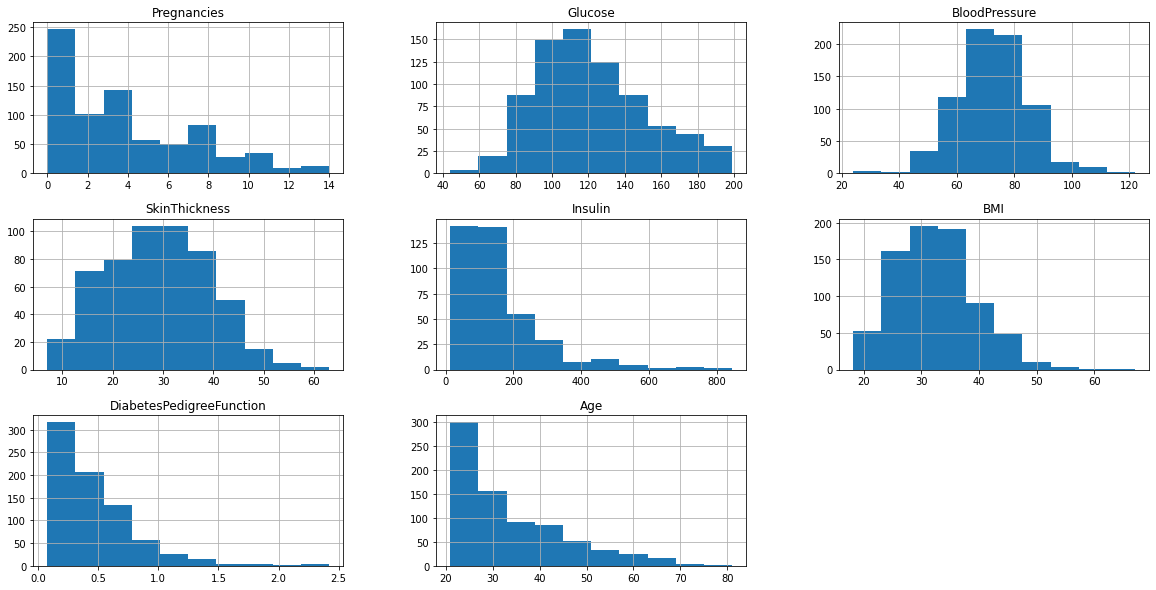

In [55]:
df.hist(figsize=(20,10));

In [56]:
#Feature Engineering
df["Age"].describe()

count    765.000000
mean      33.172549
std       11.721195
min       21.000000
25%       24.000000
50%       29.000000
75%       40.000000
max       81.000000
Name: Age, dtype: float64

In [57]:
#Data Cleaning
#When some values is not make sense I can use the method where these values filled with "mean" and "median" values of these columns.
#If I have too much outliers, the best way is filling with the "median" values.
#I will show the difference between the columns that filled by "mean" and "median"

In [60]:
df = df.fillna(df.groupby(['Age', 'Outcome', 'Pregnancies']).transform('median'))
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
760,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
761,2,122.0,70.0,27.0,84.5,36.8,0.340,27,0
762,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
763,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [61]:
df.isnull().any()
#I saw that missing_values list ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"] has null values.

Pregnancies                 False
Glucose                     False
BloodPressure                True
SkinThickness                True
Insulin                      True
BMI                          True
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [65]:
df.groupby(["Age","Outcome", "Pregnancies"]).head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,175.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,100.0,26.6,0.351,31,0
2,8,183.0,64.0,32.0,175.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
758,9,170.0,74.0,31.0,175.0,44.0,0.403,43,1
759,9,89.0,62.0,27.0,100.0,22.5,0.142,33,0
760,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
762,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0


In [66]:
df = df.fillna(df.groupby(['Outcome']).transform('median'))

In [67]:
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [68]:
df['Outcome'] = df['Outcome'].astype(int)
df.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [69]:
X = df.drop('Outcome',axis=1)
y= df['Outcome']

In [70]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,175.0,33.6,0.627,50
1,1,85.0,66.0,29.0,100.0,26.6,0.351,31
2,8,183.0,64.0,32.0,175.0,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33


In [92]:
X_train ,X_test ,y_train ,y_test = train_test_split(X,y , test_size=.2)

In [93]:
##### Creating Tensors
X_train =torch.FloatTensor(X_train.values)
X_test=torch.FloatTensor(X_test.values)
y_train=torch.LongTensor(y_train.values)
y_test=torch.LongTensor(y_test.values)

In [94]:
X_train.shape

torch.Size([612, 8])

# Create the model using pytorch

In [82]:
class ANN_Model(nn.Module):
  def __init__(self,input_feature=8,hidden1=20,hidden2=20,output_feature=2):
    super().__init__()
    self.conected1= nn.Linear(input_feature,hidden1)   
    self.conected2= nn.Linear(hidden1,hidden2)
    self.out =nn.Linear(hidden2,output_feature)
  def forward(self,x):
    x = F.relu(self.conected1(x))
    x = F.relu(self.conected2(x))
    x = F.relu(self.out(x))
    return x 





In [83]:
torch.manual_seed(20)
model = ANN_Model()

In [84]:
model.parameters

<bound method Module.parameters of ANN_Model(
  (conected1): Linear(in_features=8, out_features=20, bias=True)
  (conected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>

In [86]:
loss_fun = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=.01)

In [96]:
epochs = 500
loss_lest =[]
for i in range(epochs):
  y_pred =model.forward(X_train)
  loss = loss_fun(y_pred,y_train)
  loss_lest.append(loss)
  if i%10==1:
    print("Epoch number: {} and the loss : {}".format(i,loss.item()))
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()












 

Epoch number: 1 and the loss : 0.7559481859207153
Epoch number: 11 and the loss : 0.5403807163238525
Epoch number: 21 and the loss : 0.5432347655296326
Epoch number: 31 and the loss : 0.5374637842178345
Epoch number: 41 and the loss : 0.5250536799430847
Epoch number: 51 and the loss : 0.5150399208068848
Epoch number: 61 and the loss : 0.5095024108886719
Epoch number: 71 and the loss : 0.5047330856323242
Epoch number: 81 and the loss : 0.5001847743988037
Epoch number: 91 and the loss : 0.4980674684047699
Epoch number: 101 and the loss : 0.49356457591056824
Epoch number: 111 and the loss : 0.491637647151947
Epoch number: 121 and the loss : 0.48862531781196594
Epoch number: 131 and the loss : 0.48446908593177795
Epoch number: 141 and the loss : 0.4797716438770294
Epoch number: 151 and the loss : 0.4761509597301483
Epoch number: 161 and the loss : 0.47057607769966125
Epoch number: 171 and the loss : 0.4715662896633148
Epoch number: 181 and the loss : 0.4772443473339081
Epoch number: 191 an

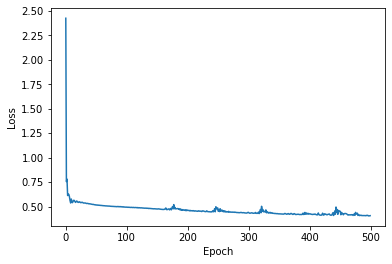

In [106]:
with torch.no_grad():
  plt.plot(range(epochs),loss_lest)
  plt.ylabel('Loss')
  plt.xlabel('Epoch')

In [107]:
#### Prediction In X_test data
predictions=[]
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_pred=model(data)
        predictions.append(y_pred.argmax().item())
        print(y_pred.argmax().item())

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
